In [8]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 

### Create base vector

In [9]:
state = "|1,1>"
of = np.linspace(-3*0.5,3*0.5,2)
of0 = np.array([0,10])
bv = BasicStateJitter(state,offset=of0)

### Print vector input and new base

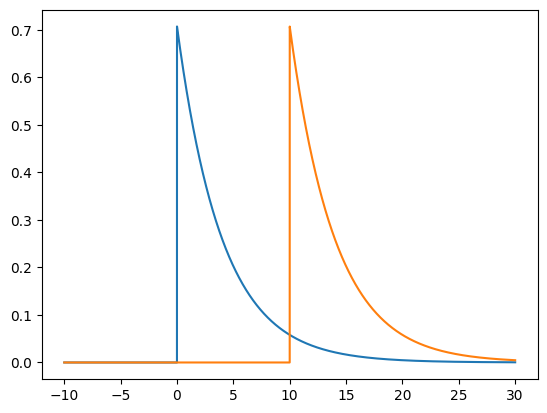

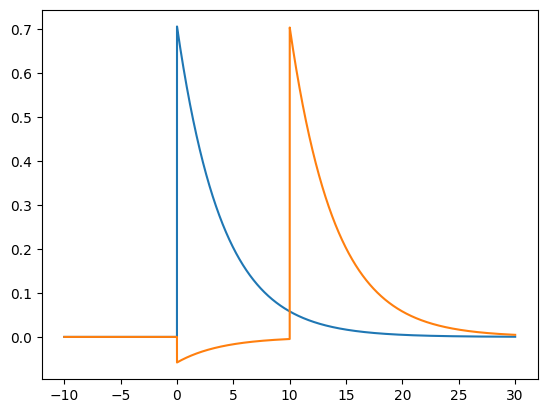

In [10]:
bv.print_vect()

### Coefficient matrix

In [11]:
print(bv.coef_matrix)

[[1.00024982 0.        ]
 [0.08206076 0.99660447]]


### States used and coefficient associated

In [12]:
print(bv.coef_list )
print(bv.bs_vector)

[0.00673733 0.99371678 0.         0.        ]
[[(1, 1), (0, 0)], [(1, 0), (0, 1)], [(0, 1), (1, 0)], [(0, 0), (1, 1)]]


### Create HOM circuit

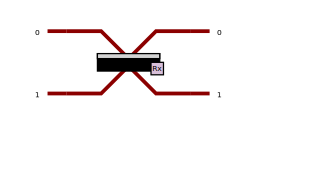

In [13]:
circuitHOM = pcvl.Circuit(2)
circuitHOM.add((0,1), pcvl.BS())
pcvl.pdisplay(circuitHOM)

### Use processor on HOM

In [14]:
Pj = ProcessorJitter(bv,circuitHOM)
Pj.print_output()

,"|0,0>","|0,1>","|1,0>","|2,0>","|1,1>","|0,2>"
"|0,0>",0,0,0,0,0,0
"|0,1>",0,1/2,1/2,0,0,0
"|1,0>",0,1/2,1/2,0,0,0
"|1,1>",0,0,0,1/2,0,1/2


|2,0> [0.25179786]
|1,1> [0.49685839]
|0,2> [0.25179786]
Probabilite totale = 1.0004541123581603
